<a href="https://colab.research.google.com/github/TmTrojcak/Computational_Physics/blob/main/Tyler_Trojcak_PHYS250_midterm_project_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computational Physics: Midterm Project 2025



### Overview

The goal of this project is to model a ski jumper on the Lake Placid H120 ski jump.

We will break the problem into two parts.

* **Part 1**: skier slides down incline.  
  * We will consider the following forces: gravity, friction, and air resistance (drag).
  * Our goal here is to determine the skier's position, velocity, and acceleration as they travel to the bottom of the incline.
  * We will use the skier's final speed at the bottom of the incline as the input speed to part 2.

* **Part 2**: skier flies through the air and lands somewhere down the slope.
  * We will consider the following forces: gravity, friction, air resistance (drag), and lift.
  * Our goal here is to determine the skier's velocity at the bottom of the incline.

### Parameters

| Param | value | Part |
|---|---|--|
|Inrun length |98 m | 1|
|Incline of slope | 30$^\circ$ |1, 2|
|$\mu_k$ |0.05| 1|
|launch angle at end of incline |-11$^\circ$ | 2 |
|skier's jump speed perpendicular to slope | 2.0 m/s | 2 |




In [35]:
# import numpy and pyplot
import numpy as np
import matplotlib.pyplot as plt

# Part 1: Skier Sliding Down incline

## 1.0 - Introduction

* In Part 1, we will model the motion of the skier as they descend the incline and gain speed.
* We adopt a coordinate axis such that the x axis is along incline and the y axis is perpendicular to the incline.


$$ \sum F = m a_x $$
$$ \vec{F}_n + \vec{F}_g + \vec{F}_f + \vec{F}_{drag} = m a_x$$

* The acceleration is the y direction is zero:
$$m a_y = F_n - mg cos\theta = 0$$
and this yields an equation for the normal force:
$$F_n = mg cos\theta$$

* The acceleration in the x direction is not zero.
$$ma_x = mg sin\theta - \mu_k mg cos\theta - B_2 v v_x$$
and the resulting equation for the acceleration is:
$$a_x = g sin\theta - \mu_k g cos\theta - \frac{B_2}{m} v v_x$$






## 1.1 - Function to Calculate B2

(5 points)

Write a function called `get_B2` to calculate B2.


### Input Parameters
* A : cross-sectional area, in meters

### Optional Input Parameters
* C : drag coeffiecient, default value is 0.7
* rho_air : density of air in kg/m^3, default value is 1.225

### Return
* B2 : drag parameter

In [36]:
# your function get_B2 here
def get_B2(A, C=0.7, rho_air=1.225):
  B2 = 0.5 * C * rho_air * A
  return B2

## 1.2 - Function to Calculate the Acceleration Down the Incline

(5 points)

Write a function to calculate the x acceleration for Part 1.

#### Input Parameters
* vx : speed of the skier, in units of m/s
* B2 : drag parameter
* m : mass of skier, in units of kg
* theta : angle of the incline, in units of radians

#### Optional Input Parameters
* mu_k : coeffiecient of kinetic friction, default value is 0.07


#### Return
* ax : the acceleration in the x direction

In [37]:
# your function to calculate acceleration down the incline
def accel_down_incline(vx, B2, m, theta, mu_k=0.07):
  g = 9.81
  ax = g*np.sin(theta) - mu_k*g*np.cos(theta) - (B2*(vx**2))/m
  return ax

## 1.3 - Write Your Calculate Function

(5 points)

* This function will use the Euler method to calculate the position, velocity, acceleration, and time as the skier moves down the incline.  
* The calculations will continue until the skier reaches the end of the incline. (*Hint:* a `while` loop is good for this!)

#### Inputs Parameters
* x0 : initial x position
* v0 : initial x velocity
* A : cross-sectional area of skier
* theta_rad : angle of the hill incline, in units of radians

#### Optional Input Parameters
* inrun_length : length of the slope in the x direction in meters, default value is 98


#### Return
* tarr1 : array containing the time in seconds
* xarr1 : array containing the x position in meters
* vxarr1 : array containing the x velocity in m/s
* axarr1 : array containing the x acceleration in m/s^2

In [67]:
# your calculate function here
def calculate(x0, v0, A, theta_rad, inrun_length=98):

  dt = 0.01

  # Find B2
  B2 = get_B2(A)

  # Initialize arrays
  tarr1 = np.array([0])
  xarr1 = np.array([x0])
  vxarr1 = np.array([v0])
  axarr1 = np.array([accel_down_incline(v0, B2, m, theta_rad)])

  # Initialize variables for while loop
  vx = v0
  x = x0
  t = 0

  # Use Euler Method to calculate the position, velocity, acceleration, and time as the skier moves down the incline.
  while x < inrun_length:
    t = tarr1[-1] if tarr1.size > 0 else 0
    x = xarr1[-1] if xarr1.size > 0 else 0
    vx = vxarr1[-1] if vxarr1.size > 0 else 0

    ax = accel_down_incline(vx, B2, m, theta_rad)
    vx = vx + ax*dt
    x = x + vx*dt
    t = t + dt

    # Use data calculated and update the initialized arrays
    tarr1 = np.append(tarr1, t)
    xarr1 = np.append(xarr1, x)
    vxarr1 = np.append(vxarr1, vx)
    axarr1 = np.append(axarr1, ax)
  return tarr1, xarr1, vxarr1, axarr1

## 1.4 - Function to Plot Results

(5 points)

* Make a function to create a figure with 3 rows and 1 column to plot the position, velocity, and acceleration of skier versus time, as they travel down the incline.

#### Input Parameters
  * tarr1
  * xarr1
  * vxarr1
  * axarr1

#### Return

Nothing.

In [64]:
# your plot function here
def plot_results(tarr1, xarr1, vxarr1, axarr1):
  fig, axs = plt.subplots(3, 1, figsize=(10, 10))

  # Plot 1
  axs[0].plot(tarr1, xarr1)
  axs[0].set_xlabel('Time (s)')
  axs[0].set_ylabel('Position (m)')
  axs[0].set_title('Position vs Time')

  # Plot 2
  axs[1].plot(tarr1, vxarr1)
  axs[1].set_xlabel('Time (s)')
  axs[1].set_ylabel('Velocity (m/s)')
  axs[1].set_title('Velocity vs Time')

  # Plot 3
  axs[2].plot(tarr1, axarr1)
  axs[2].set_xlabel('Time (s)')
  axs[2].set_ylabel('Acceleration (m/s^2)')
  axs[2].set_title('Acceleration vs Time')
  plt.tight_layout()
  plt.show()
  return

## 1.5 - Putting It All Together

(5 points)

In the cell below, write the code needed to run your functions and model the motion of the skier down the inrun slope.

### Questions:



1. What is the skier's final velocity in units of m/s and mph?

**Final velocity in units of m/s: 25.19840917229342**

**Final velocity in units of mph: 56.367329413870046**

2. Does the skier reach terminal velocity?  Justify your answer.
**The Skier does not reach terminal velocity as the final velocity of 25.1984 m/s does not reach the terminal velocity of 56.5685 m/s.**

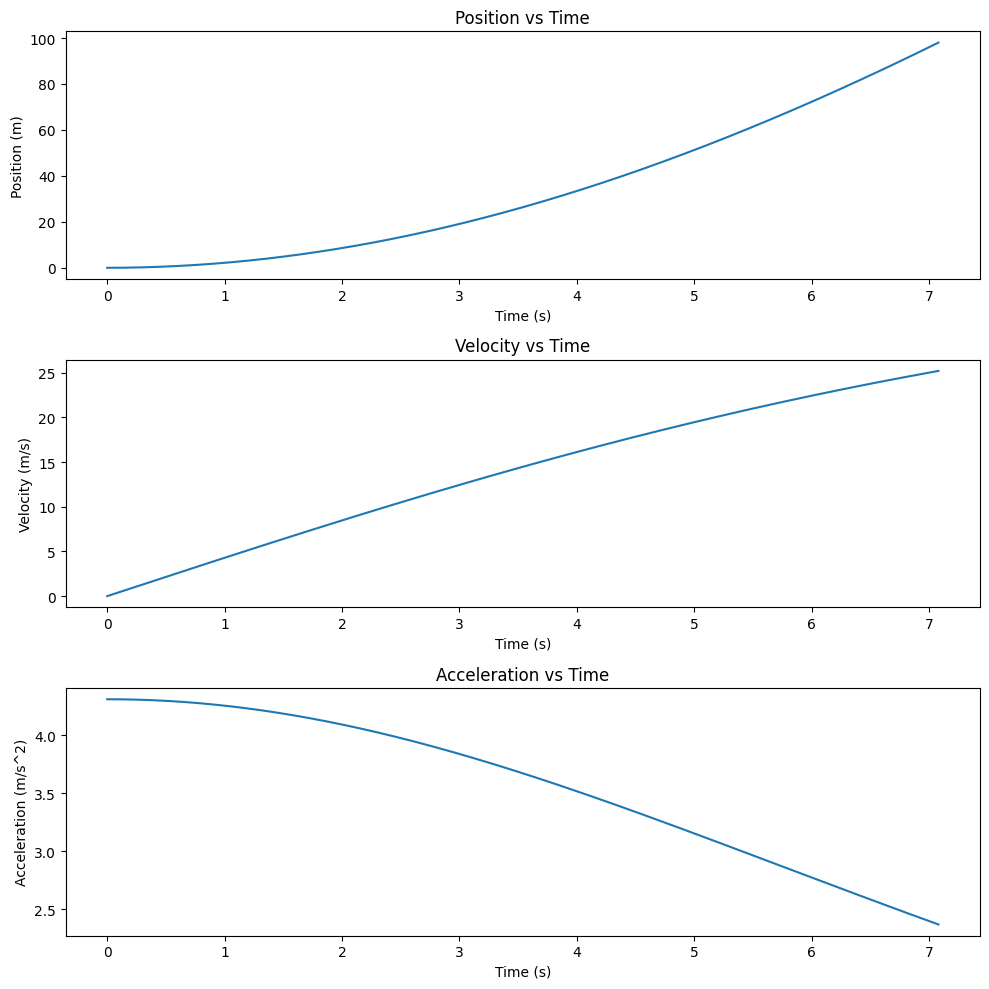

In [72]:
# ASSUMPTIONS
height = 1  # meter, in crouched position
width = 0.5 # meter

# cross-sectional area
A = height * width

m = 70 # mass in kg

# your additional code below
theta = np.deg2rad(30)
x0 = 0
v0 = 0

tarr1, xarr1, vxarr1, axarr1 = calculate(x0, v0, A, theta)
plot_results(tarr1, xarr1, vxarr1, axarr1)

In [73]:
# List final velocity in both meters per second and mile per hour.
print(f'Final velocity in units of m/s: {vxarr1[-1]}')
print(f'Final velocity in units of mph: {vxarr1[-1] * 2.23694}')

# Test if the Skier reaches terminal velocity.
C = 0.7
rho_air = 1.225
g = 9.8

Ter_v = np.sqrt((2*m*g)/(rho_air*C*A))
print(f'Terminal velocity: {Ter_v} in m/s')

Final velocity in units of m/s: 25.19840917229342
Final velocity in units of mph: 56.367329413870046
Terminal velocity: 56.568542494923804 in m/s


# Part 2: The Jump

The second part of our analysis starts with the skier jumping off the inrun and ends when they land on the slope.  


## 2.0 : Modeling the Slope of the Hill & When to Stop

* The skier is jumping along the hill, and the y height of the hill decreases as the x position of the skier increases.
* We will stop the Euler calculation when the skier's y position is equal to the hill's y height.  You will compare the skier's $y$ position at every step with the height of the hill at that value of $x$, and stop when $y < = y_{hill}$.

* To accomplish this, we will need a function that returns the height of the hill for each value of $x$.




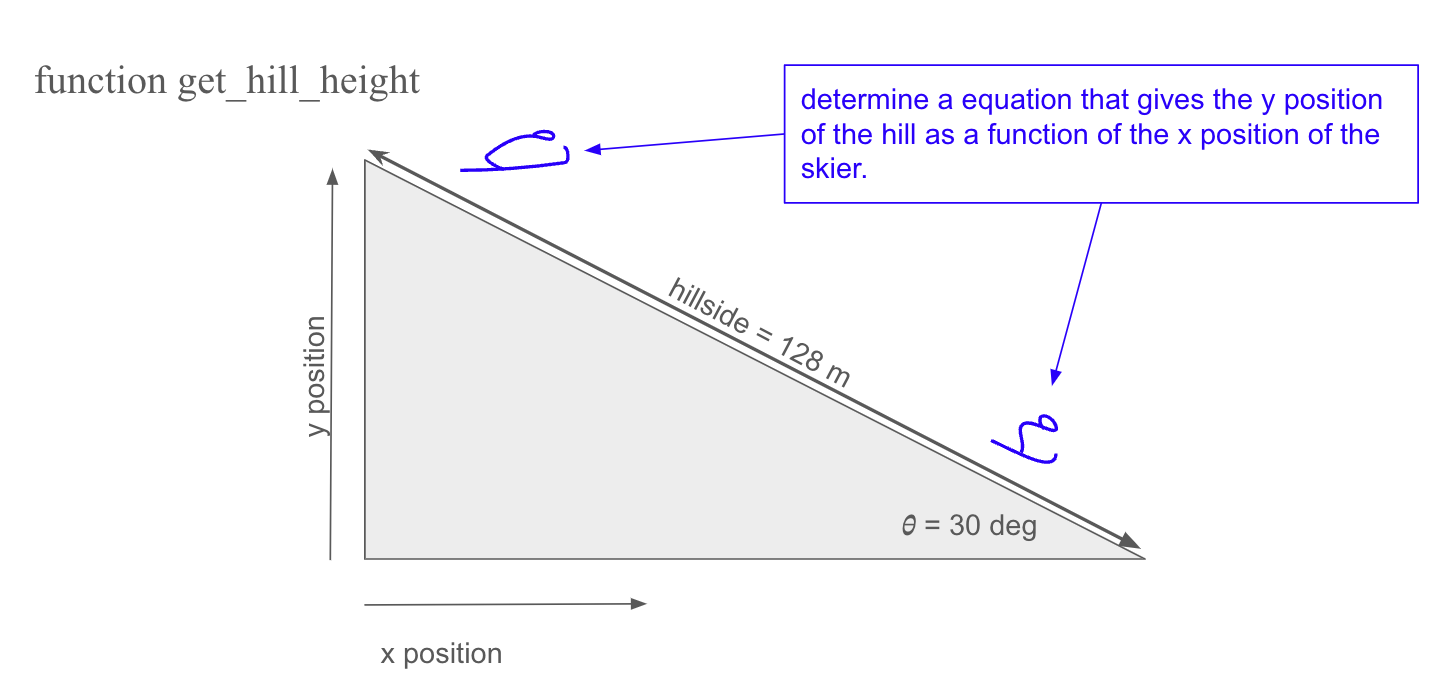

## 2.1 - Function to get hill height

(5 points)

Write a function  that returns the height of the hill as a function of horizontal distance from the start of the jump.

#### Input Parameters
* x position

#### Return
* height of the hill

In [ ]:
# your get_hill_height function here

## 2.2 - Testing your hill height function

(5 points)

* create an array of x values

* use your `get_hill_height` function to get the height of the hill at each position.

* create a plot of hill height vs. x position, and make sure this looks correct.

In [ ]:
# your code to test get_hill_height here



## 2.3 - Force analysis

**NOTE: Please refer to the videos that I put on canvas for more details on how to analyze the forces and derive the acceleration.**

* We align the x axis horizontally and the y axis vertically.
* We follow Elmark+2022 figure to express the drag and lift force in terms of the angle $\phi$ between the horizontal and the skier's direction of motion.  
  * Note that $\phi$ is not a constant but instead changes throughout the skier's flight.  
  * The drag force is directed in the opposite direction of motion, and the lift force is perpendicular to the direction of motion.

* Force Analysis:


$$ \sum \vec{F} = m \vec{a} $$

$$ \vec{F}_{lift} + \vec{F}_g  + \vec{F}_{drag} =  m \vec{a}$$

* We can then analyze the x and y components separately.
$$m a_y = F_L cos(\phi) - F_D sin(\phi) - F_g $$

$$m a_x = -F_L sin(\phi) - F_D cos(\phi)$$

### Describing the Drag and Lift Forces

The magnitude of the drag force is:
$$ \rm F_D = \frac{1}{2} C_D \rho_{air} A v^2  $$
and the direction is opposite the direction of motion.


Similarly, the magnitude of the lift force is:
$$ \rm F_L = \frac{1}{2} C_L \rho_{air} A v^2 $$
and the direction is opposite the direction of motion.


In terms of components:

$$ \rm F_{Dx} = - \frac{1}{2} C_D \rho_{air}~ A ~v^2 ~cos(\phi) = - \frac{1}{2} C_D \rho_{air}~ A ~v ~v_x  $$
and
$$ \rm F_{Dy} = - \frac{1}{2} C_D \rho_{air}~ A ~v^2 ~ sin(\phi) = - \frac{1}{2} C_D \rho_{air}~ A ~v~v_y  $$

Similarly, the components of the lift force are:


$$ \rm F_{Lx} = - \frac{1}{2} C_L \rho_{air}~ A ~v^2 ~sin(\phi) = - \frac{1}{2} C_L \rho_{air}~ A ~v ~ v_y  $$
and
$$ \rm F_{Ly} = + \frac{1}{2} C_L \rho_{air}~ A ~v^2 ~cos(\phi) = + \frac{1}{2} C_L \rho_{air}~ A ~v ~v_x  $$

### Net Accelerations

* The resulting accelerations in the horizontal and vertical directions are:

$$a_x =  -\frac{B_L}{m} v~v_y - \frac{B_D}{m} v~v_x$$

$$a_y = \frac{B_L}{m} v~v_x - \frac{B_D}{m} v~v_y - g $$


## 2.4 - Acceleration Functions

(10 points)

Write your acceleration functions: `get_ax_part2` and `get_ay_part2` to calculate the acceleration of the skier during the jump phase.

### Acceleration Functions

Each acceleration function should have:

#### Input Parameters:

* vx - velocity in the horizontal direction
* vy - velocity in the vertical direction
* BL - coefficient of lift
* BD - coefficient of drag
* m - mass

#### Return
* acceleration


In [ ]:
# your get_ax_part2 function



# your get_ay_part2 function




## 2.4 - Calculate Function

(5 points)

Write you function to calculate the Euler Method.

#### Input Parameters

Determine what you need

#### Description
* This function will initialize lists for:  
  * tarr2
  * xarr2, yarr2
  * vxarr2, vyarr2
  * axarr2, ayarr2

* Use a `while` loop to continue the Euler calculation until the skier's y height is equal to (or less than) the height of the hill.  This is the point where the skier lands.

#### Return
  * tarr2
  * xarr2, yarr2
  * vxarr2, vyarr2
  * axarr2, ayarr2




In [ ]:
# your calculate function here



## 2.6 - Functions to Make Plots

### 2.6.1 - make_plots

(5 points)

* Write a function called `make_plots` to create a 3x2 plot (`plt.subplot(3,2,1)`).
* Plot the horizontal position, velocity and acceleration in the left column.
* Plot the vertical position, velocity, and acceleration in the right column.

#### Input Parameters
  * tarr2
  * xarr2, yarr2
  * vxarr2, vyarr2
  * axarr2, ayarr2

#### Return
* nothing

In [ ]:
# Your plot make_plots function here



### 2.6.2 - plot_trajectory

(5 points)

* Write a second function called `plot_trajectory` that plots the vertical position versus the horizontal position.  Color-code the points by time using `plt.scatter`

* add a line to the plot to show the slope of the hill.  use your `get_hill_height` to create this line.



In [ ]:
# your plot_trajectory function here

## 2.7 - Main Program

(5 points)

Write your `main` function in this cell.

#### Input Parameters
* A - cross-sectional area of skier
* BD - drag coefficient
* BL - lift coefficient

#### Return
* tarr2
* xarr2, yarr2
* vxarr2, vyarr2
* axarr2, ayarr2

In [ ]:
def main(A, BD, BL, m, dt=.1, vperp=2., plotflag=True):
  """
  PARAMS:
  * A - cross sectional area
  * BD - drag coefficient
  * BL - lift coefficient
  * m - mass of skier in kg
  * plotflag - boolean, make plots when true

  OPTIONAL PARAMS:
  * dt - time step in seconds, default value is 0.1
  * vperp - how fast the skier pushes off perpendicular to slope at the end of the run.  default value is 2 m/s.

  RETURN:

  you fill in the rest

  """
  ##############################################
  ## INITIAL VELOCITIES FOR PART 2
  ##############################################

  # angle of the end of the slope from part 1
  jump_angle_deg = -11 # in degrees

  # convert your jump angle to radians
  jump_angle_rad =

  # calculate the components of the jump speed
  # in the horizontal and vertical directions.
  vx_perp =
  vy_perp =


  # use the speed at end of runway/ramp in part 1
  # as the skier's input speed for part 2
  vramp =

  # calculate the components of the ramp speed
  # in the horizontal and vertical directions.
  vx_ramp =
  vy_ramp =

  # get the initial speed in the x and y directions
  # by summing the contribution from the
  # perpendicular velocity and the
  # speed at the bottom of the ramp
  vx0 = vx_perp + vx_ramp
  vy0 = vy_perp + vy_ramp

  # Initial positions
  # assume the initial x position is zero
  # assume that the skier's y position is initially 2 m above the hill

  ##############################################
  ## CALLING FUNCTIONS
  ##############################################

  # call calculate

  if plotflag:
    # call plot_trajectory to plot the vertical position
    # vs the horizontal position


    # call make_plots to plot parameters vs time

    pass

  # return arrays



## 2.8 - Calling Main

(5 points)

In the cell below, you can define any parameters that need to be passed into main, and then call main.


In [ ]:
##############################################
## AIR RESISTANCE PARAMETERS
##############################################

# values for the drag and lift coefficients
# DON'T CHANGE THESE
CD = 0.8 # from Gardan+2017
CL = 1.2*CD

# enter your cross-sectional dimensions for the skier
# in the flight position
height =  # meter, in flight position
width =  # meter
A = height * width

# set the mass of the skier


# calculate the drag coefficients
BD = get_B2(A, C=CD)
BL = get_B2(A, C=CL)

# call main



# 3 - Complete Part 3.1 or 3.2

## 3.1 - Angle between the skis

(10 points)

* Historically, ski jumpers kept their skis parallel beneath their bodies.  
* More recently, jumpers create a V with their skis, and this increases the length of their jumps by increasing the area over which lift can act.
* Assume the skis are elevated about 20 degrees above the horizontal.
* Then estimate the cross-sectional area of the skier when the angle between the skis is: `[0, 15, 30, 45]` degrees.
* Create a `for` loop, and calculate the trajectory of the skier for each angle to determine the optimum angle between the skis.
* Create one graph that shows all of the trajectories on one plot.  You can do this by setting `plotflag=False` when calling `main`, and then create the plot in the cell below.  You can plot the trajectory in each pass of the for loop using the `xarr` and `yarr` returned from `main`.


## 3.2 - Angle of the Skis Above the Horizontal

(10 points)

* The angle of the skis relative to the horizontal, `alpha`, will affect the ratio of lift to drag.
* A few papers (e.g. Gardan+2017, Journal of Biomechanics) estimate the lift to drag ratio use either wind tunnels or numerical simulations.  
* We will use these estimates to see how the angle `alpha` affects the skier's trajectory.
* Using the values listed below, you can create a loop to calculate the trajectory for each combination of drag and lift parameters.
* You can update the drag and lift coefficients as follows:
```
BD = get_B2(A,C=CD[i])
BL = get_B2(A,C=CL[i])
```
* Create one graph that shows all of the trajectories on one plot.  You can do this by setting `plotflag=False` when calling `main`, and then create the plot in the cell below.  You can plot the trajectory in each pass of the for loop using the `xarr` and `yarr` returned from `main`.
* Determine which value of `alpha` produces the longest jump.


In [ ]:
alphas = np.array([14, 21.5, 29, 36.5])
CD = np.array([.7, .7, .8, 1])
CL = np.array([.6, .8, 1, 1.3])

In [ ]:
# your code here


# 5 - Bonus: Animate Your Best Jump

(5 points)


Create an animation to show the skier's position during the jump phase as a function of time.

# Submitting Your Results

* You will submit this notebook.
* You will present your results in your wiki, and you will have a separate assignment for submitting the wiki link.